In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02']
df['Y'] = df['9.869877579082642072e-01']
df['Class'] = df['0.000000000000000000e+00']

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00,X,Y,Class
0,2.115098,-0.046244,1.0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0,2.112857,0.662084,1.0


In [6]:
df.drop(columns=['3.159499363321345566e-02','9.869877579082642072e-01','0.000000000000000000e+00'],inplace=True)

In [7]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [8]:
df['Class'].value_counts()

Class
1.0    50
0.0    49
Name: count, dtype: int64

In [9]:
new_row = pd.DataFrame({'X':[0.031594],'Y':[0.986987],'Class':[0.0]})

In [10]:
df = pd.concat([df,new_row], ignore_index=True)

In [11]:
df.shape

(100, 3)

In [12]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


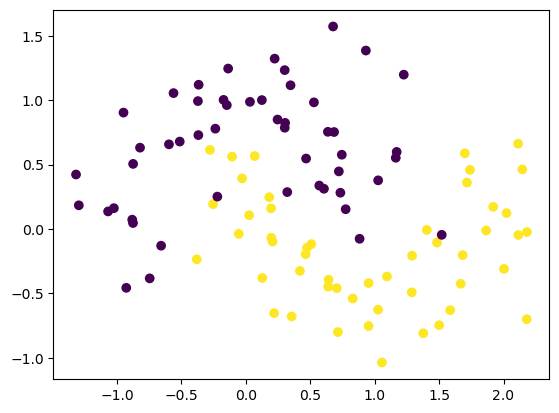

In [13]:
plt.scatter(df['X'],df['Y'],c=df['Class'])
plt.show()

In [14]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [48]:
model = Sequential()

model.add(Dense(10, activation='sigmoid',input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.get_weights()

[array([[-0.05676436, -0.10843658,  0.18646324,  0.26411134,  0.47642523,
          0.13291764, -0.2825393 ,  0.5743658 ,  0.5000877 , -0.5166042 ],
        [-0.0287745 ,  0.24178249,  0.20611781, -0.5633745 , -0.37517184,
          0.38450557,  0.60367626, -0.30847952, -0.5075263 ,  0.35312742]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.05072677],
        [-0.3566732 ],
        [ 0.5582321 ],
        [ 0.20036471],
        [-0.666565  ],
        [-0.1003896 ],
        [ 0.05611384],
        [-0.12045872],
        [-0.7352791 ],
        [ 0.06946468]], dtype=float32),
 array([0.], dtype=float32)]

In [50]:
initial_weights = model.get_weights()

In [51]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [52]:
model.set_weights(initial_weights)

In [53]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [54]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
history = model.fit(x,y,epochs=100,validation_split=0.2,verbose=True)

Epoch 1/100
3/3 [==============================] - 0s 81ms/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6934 - accuracy: 0.3500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

In [56]:
model.get_weights()

[array([[-0.4545595, -0.4545595, -0.4545595, -0.4545595, -0.4545595,
         -0.4545595, -0.4545595, -0.4545595, -0.4545595, -0.4545595],
        [ 0.4730691,  0.4730691,  0.4730691,  0.4730691,  0.4730691,
          0.4730691,  0.4730691,  0.4730691,  0.4730691,  0.4730691]],
       dtype=float32),
 array([-0.10155018, -0.10155018, -0.10155018, -0.10155018, -0.10155018,
        -0.10155018, -0.10155018, -0.10155018, -0.10155018, -0.10155018],
       dtype=float32),
 array([[-0.05954727],
        [-0.05954727],
        [-0.05954727],
        [-0.05954727],
        [-0.05954727],
        [-0.05954727],
        [-0.05954727],
        [-0.05954727],
        [-0.05954727],
        [-0.05954727]], dtype=float32),
 array([0.06061816], dtype=float32)]

9600/9600 [==============================] - 8s 811us/step


<Axes: >

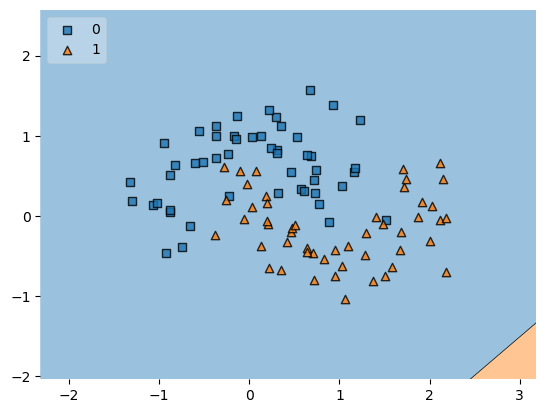

In [57]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)